In [1]:
#importing the basic libararies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#load the dataset

In [31]:
df = pd.read_csv("Customer Churn.csv")

In [33]:
#basic ob=verview of dataset
print(df.shape)
print()
print(df.columns)
print()
print(df.head())
print()
print(df.info())
print()
print(df.describe(include="all"))

(7043, 21)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             N

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
#convert categorical columns into encodeing

In [39]:
df['gender'] = df['gender'].replace({'Male':1, 'Female':0})


C:\Users\adity\AppData\Local\Temp\ipykernel_29248\3648116627.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male':1, 'Female':0})


In [41]:
columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in columns:
    df[col] = df[col].replace({'Yes':1, 'No':0})

C:\Users\adity\AppData\Local\Temp\ipykernel_29248\136980671.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes':1, 'No':0})


In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [45]:
# One-hot encoding
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines', 
                                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                 'TechSupport', 'StreamingTV', 'StreamingMovies'], drop_first=True)


In [47]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)


In [51]:
print(df.dtypes)

customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
OnlineSecurity_No in

In [55]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,True,False,False,False,False,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,True,False,False,False,False,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,False,False,True,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,False,False


In [21]:
#visualize churn distribution


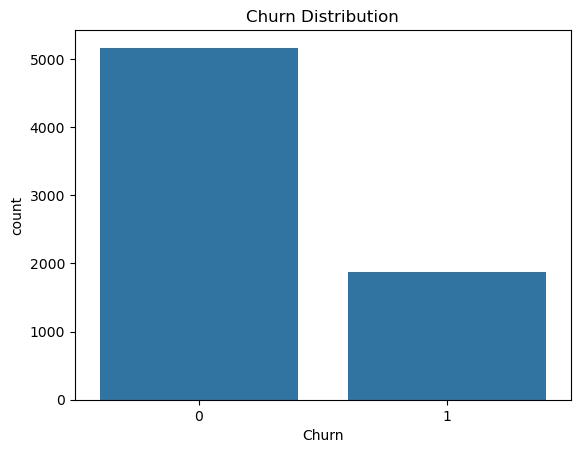

In [59]:
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


In [61]:
#visualize the relationship betweeen different columns with churn

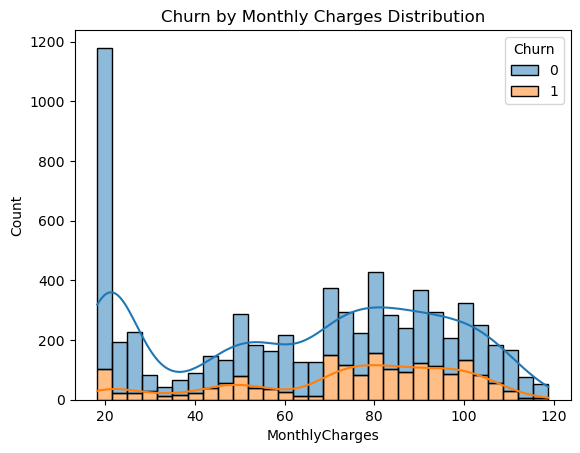

In [67]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, multiple='stack')
plt.title("Churn by Monthly Charges Distribution")
plt.show()

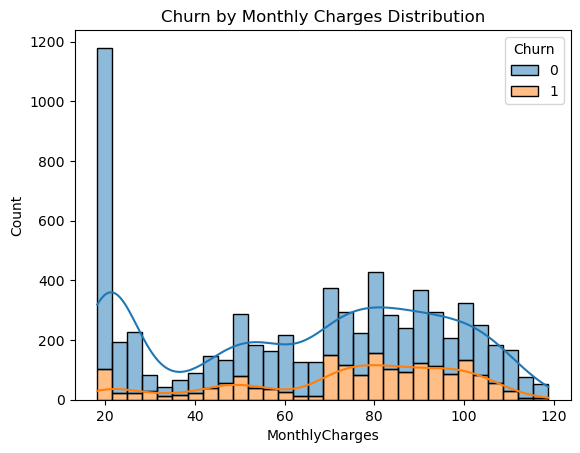

In [69]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, multiple='stack')
plt.title("Churn by Monthly Charges Distribution")
plt.show()

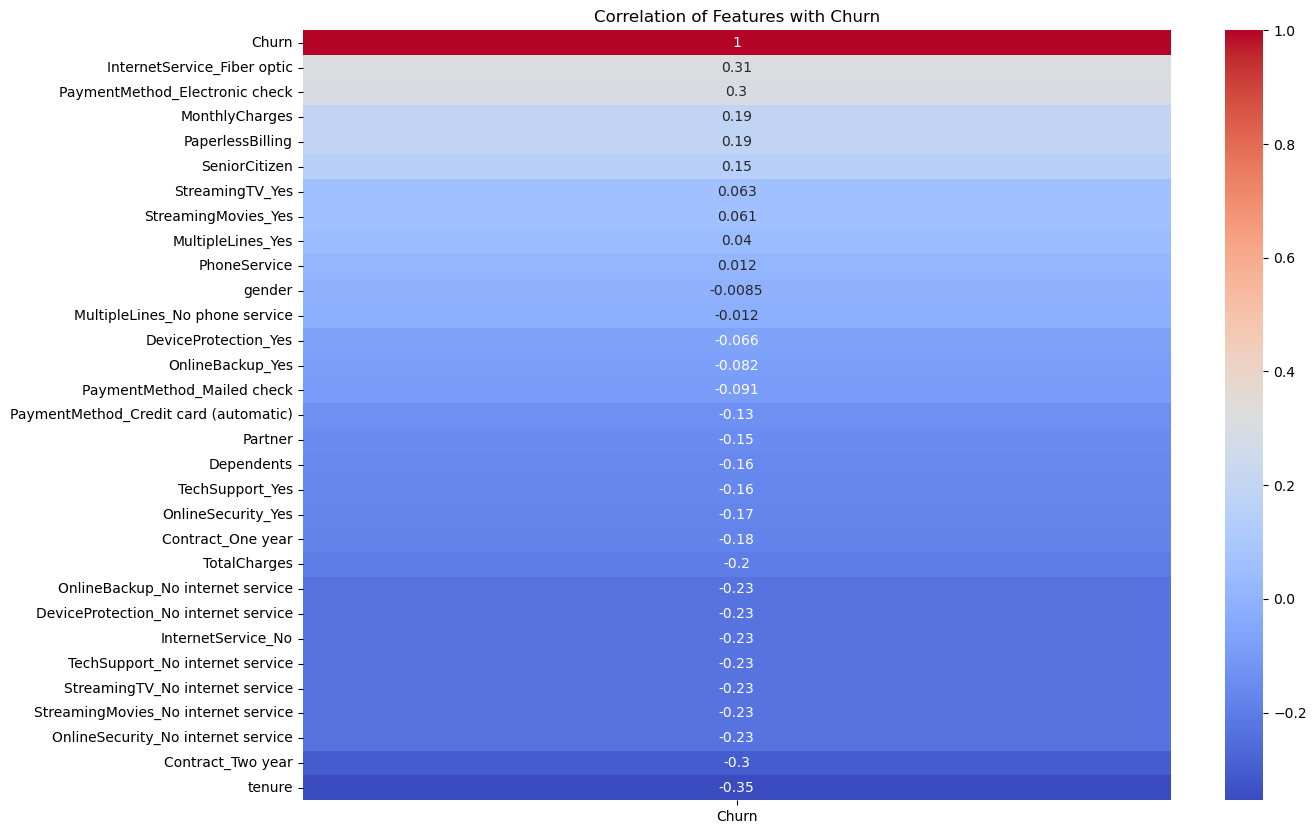

In [71]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr[['Churn']].sort_values('Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Churn")
plt.show()


In [75]:
#the cateogories with the max values are 

#InternetService_Fiber optic, PaymentMethod_Electronic check, MonthlyCharges, PaperlessBilling

#the positive factors 

In [77]:
#the cateogories with the max values are 

#tenure	, Contract_Two year

#the negative factors 

In [81]:
selected_features = [
    'Churn',
    'InternetService_Fiber optic',
    'PaymentMethod_Electronic check',
    'MonthlyCharges',
    'PaperlessBilling'
]

df_selected = df[selected_features]

In [83]:
df_selected.head()

,Churn,InternetService_Fiber optic,PaymentMethod_Electronic check,MonthlyCharges,PaperlessBilling
0,0,False,True,29.85,1
1,0,False,False,56.95,0
2,1,False,False,53.85,1
3,0,False,False,42.30,0
4,1,True,True,70.70,1


In [85]:
#relationship between differnt categories 

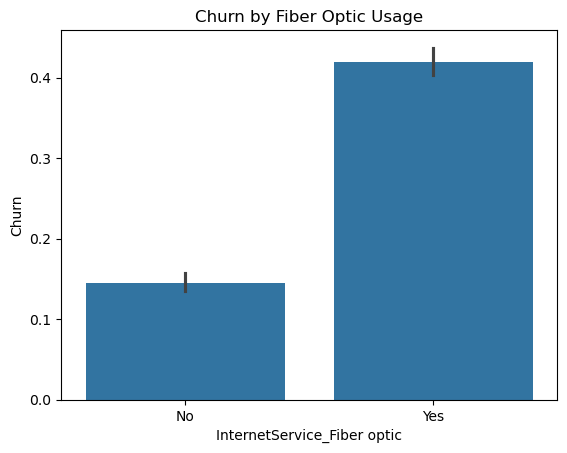

In [87]:
sns.barplot(data=df, x='InternetService_Fiber optic', y='Churn')
plt.title("Churn by Fiber Optic Usage")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

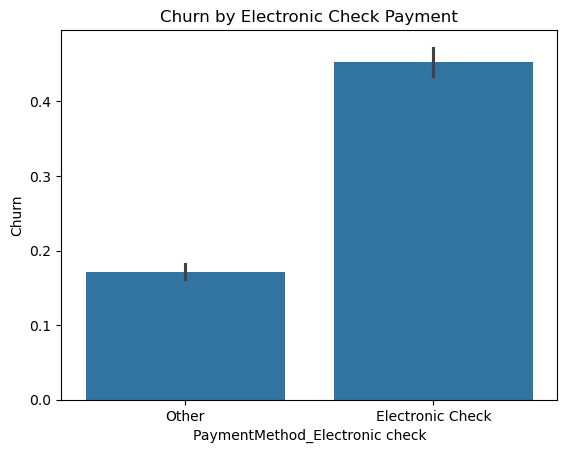

In [89]:
sns.barplot(data=df, x='PaymentMethod_Electronic check', y='Churn')
plt.title("Churn by Electronic Check Payment")
plt.xticks([0, 1], ['Other', 'Electronic Check'])
plt.show()


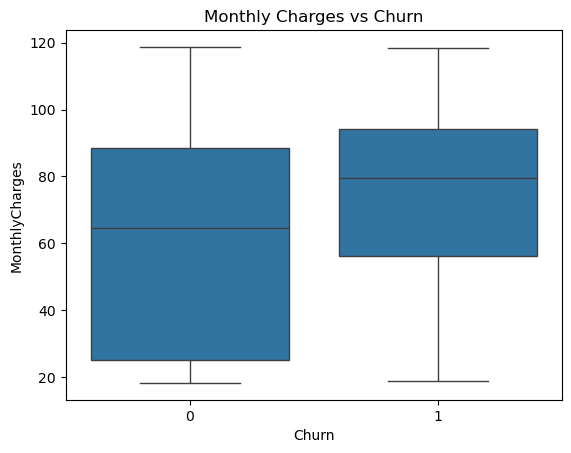

In [91]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()


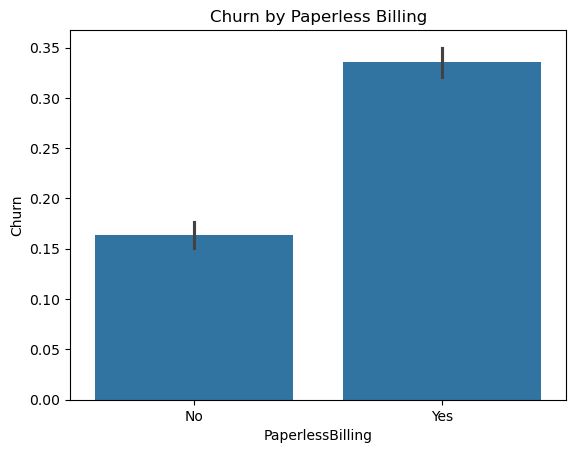

In [93]:
sns.barplot(data=df, x='PaperlessBilling', y='Churn')
plt.title("Churn by Paperless Billing")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


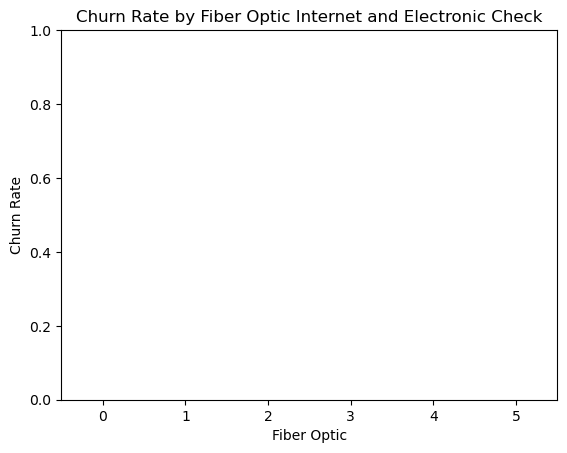

In [95]:
# Group by both categories
grouped = df.groupby(['InternetService_Fiber optic', 'PaymentMethod_Electronic check'])['Churn'].mean().reset_index()

# Rename for clarity
grouped['Fiber Optic'] = grouped['InternetService_Fiber optic'].map({0: 'No', 1: 'Yes'})
grouped['Electronic Check'] = grouped['PaymentMethod_Electronic check'].map({0: 'No', 1: 'Yes'})

# Plot
sns.barplot(data=grouped, x='Fiber Optic', y='Churn', hue='Electronic Check')
plt.title("Churn Rate by Fiber Optic Internet and Electronic Check")
plt.ylabel("Churn Rate")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_29248\1786722735.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped2 = df.groupby(['PaperlessBilling', 'MonthlyChargesGroup'])['Churn'].mean().reset_index()


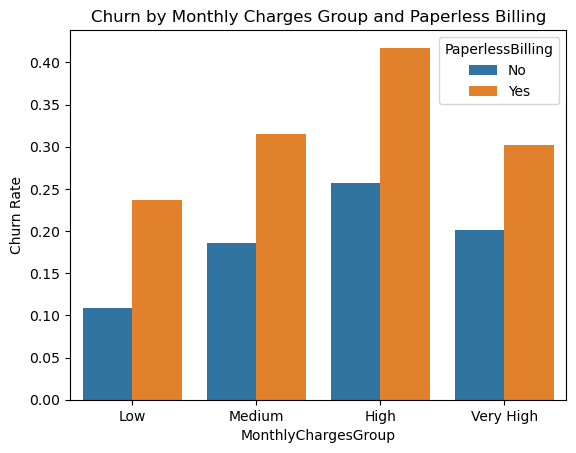

In [97]:
# Create monthly charge bins
df['MonthlyChargesGroup'] = pd.cut(df['MonthlyCharges'], bins=[0, 50, 75, 100, 150], labels=['Low', 'Medium', 'High', 'Very High'])

# Group by both
grouped2 = df.groupby(['PaperlessBilling', 'MonthlyChargesGroup'])['Churn'].mean().reset_index()
grouped2['PaperlessBilling'] = grouped2['PaperlessBilling'].map({0: 'No', 1: 'Yes'})

# Plot
sns.barplot(data=grouped2, x='MonthlyChargesGroup', y='Churn', hue='PaperlessBilling')
plt.title("Churn by Monthly Charges Group and Paperless Billing")
plt.ylabel("Churn Rate")
plt.show()


In [101]:
#For each billing tier, churn is higher for customers with paperless billing.
#High spenders with paperless billing churn the most
#Churn gradually increases with monthly charges, more so for digital customers.

In [99]:
pd.crosstab(
    [df['InternetService_Fiber optic'], df['PaymentMethod_Electronic check']],
    df['Churn'],
    normalize='index'
).round(2)


Churn                                                          0     1
InternetService_Fiber optic PaymentMethod_Electronic check            
False                       False                           0.89  0.11
                            True                            0.71  0.29
True                        False                           0.70  0.30
                            True                            0.47  0.53

In [103]:
#The combination of Fiber Optic Internet and Electronic Check payment leads to the highest churn by far (53%)

In [105]:
"""
Summary:

- Churn is most strongly associated with Fiber Optic internet and Electronic Check payments.
- Customers using both have a 53% churn rate — the highest among all combinations.
- Churn increases with monthly charges, especially for paperless billing users.
- Key business actions: incentivize digital payments, reward loyal high-paying customers, improve digital engagement.
"""


'\nSummary:\n\n- Churn is most strongly associated with Fiber Optic internet and Electronic Check payments.\n- Customers using both have a 53% churn rate — the highest among all combinations.\n- Churn increases with monthly charges, especially for paperless billing users.\n- Key business actions: incentivize digital payments, reward loyal high-paying customers, improve digital engagement.\n'